<a href="https://colab.research.google.com/github/Mohamed-Harish-M-123/Capstone-Project-II/blob/main/TED_Talks_views_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name: TED Talks views prediction - Regression

**Project Type:** Machine Learning - Regression

**Name:** MOHAMED HARISH

**Contribution:** Individual

## What is TED Talks:
TED (Technology, Entertainment, Design) Talks are a series of influential and inspiring talks given by experts and thought leaders from a wide range of fields. The talks are typically 18 minutes or less and are designed to share innovative ideas, spark conversation, and foster learning.

TED Talks began in 1984 as a conference where experts from the fields of technology, entertainment, and design could come together to share their ideas. Since then, the TED conference has expanded to cover a wide range of topics, including science, business, education, and more.

The aim of this project is to develop a machine learning model that can predict the number of views a video uploaded to the TEDx website is likely to receive. The TEDx platform hosts a vast collection of informative and thought-provoking talks from a diverse range of speakers. The prediction model will help the organizers and the speakers to determine the impact of their talks and to optimize the success of future uploads.


## GitHub Link:

#### https://github.com/Mohamed-Harish-M-123/Capstone-Project-II

## Problem Statement:

  The problem statement for this project is to develop a regression model that can accurately predict the number of views that a TEDx talk video will receive on the website. To achieve this, we will need to collect a dataset of TEDx talk videos, along with their respective view counts, and use this data to train and test the regression model.

We will need to consider a variety of factors that may influence the view count of a video, such as the topic of the talk, the speaker's profile, the length of the video, and the language of the talk. We will use feature engineering techniques to extract relevant features from the data and use various regression algorithms to build the prediction model.

The success of the project will be evaluated based on the model's accuracy in predicting the view count of TEDx talk videos.

## Importing Libraries

In [116]:
# Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_selection import f_regression

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics


## Let's load our dataset

In [117]:
# mount our drive to colab

drive.mount('/content/drive')

path = '/content/drive/MyDrive/dataset/data_ted_talks.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
df.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


## Let's explore our dataset
 

In [119]:
# Create a copy of the original data frame.

ted_talks_dataframe = df.copy()


In [120]:
# Check the shape

ted_talks_dataframe.shape

(4005, 19)

In [121]:
# Check the dataframe info

ted_talks_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [122]:
# Check for the null values

nullValues = ted_talks_dataframe.isnull().sum()

print(nullValues)

print("\nTotal Null values in this dataframe = ", nullValues.sum())

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

Total Null values in this dataframe =  1685


In [123]:
# Check for duplicate records or instances

print("Number of duplicate records in the dataset = ", ted_talks_dataframe.duplicated().sum())

Number of duplicate records in the dataset =  0


## Dataset information:


*   There are 4,005 records and 19 columns in our dataset.
*   5 columns contains null values and there are 1685 null values were present in our dataset.


*   No duplicate records.
*   Our target or dependent variable is 'views'.





## Let's proceed with Exploratory Data Analysis (EDA) - 

In [124]:
# Top ten most viewed videos in our dataset
mostViewedVideo = ted_talks_dataframe.nlargest(10, ['views'])
mostViewedVideo[['title', 'speaker_1', 'views']]

,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833
1724,How to speak so that people want to listen,Julian Treasure,41504331
2108,Inside the mind of a master procrastinator,Tim Urban,37976820
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546
2724,My philosophy for a happy life,Sam Berns,33691484
1898,The next outbreak? We're not ready,Bill Gates,33521780


<Axes: title={'center': 'Top 10 most viewed videos'}, xlabel='speaker_1', ylabel='views'>

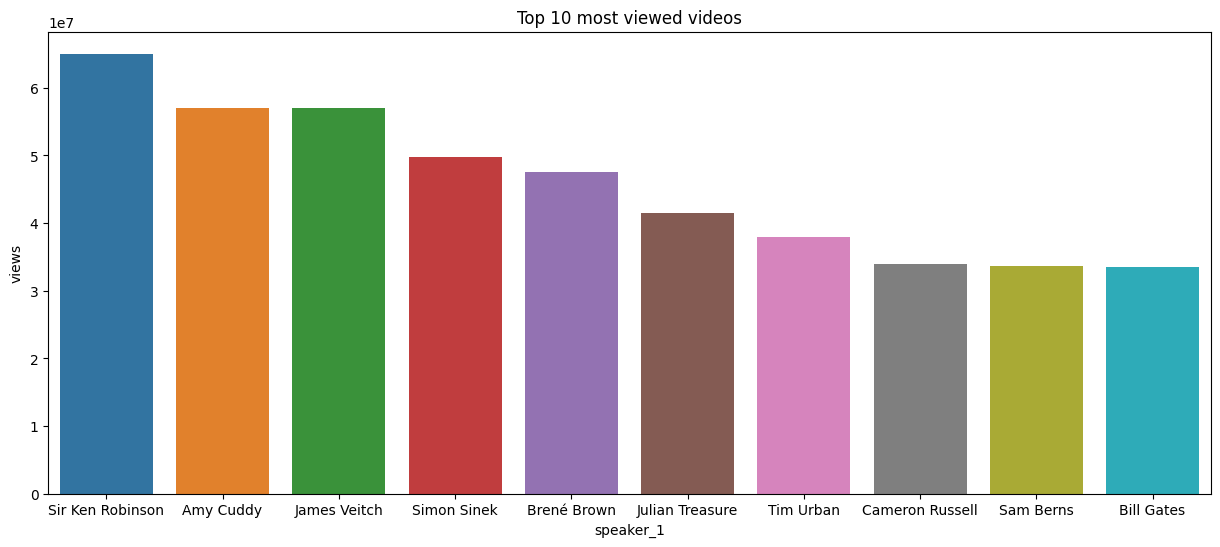

In [125]:
# Now let's visualize the above info

plt.figure(figsize = (15,6))
plt.title('Top 10 most viewed videos')
sns.barplot(data = mostViewedVideo, x = 'speaker_1', y = 'views')

In [126]:
# Now let's analyse the published date with respect to the views of the videos

print(ted_talks_dataframe['published_date'].dtype)

ted_talks_dataframe['published_date'] = pd.to_datetime(ted_talks_dataframe['published_date'])

ted_talks_dataframe['recorded_date'] = pd.to_datetime(ted_talks_dataframe['recorded_date'])

print(ted_talks_dataframe['recorded_date'].dtype)

object
datetime64[ns]


In [127]:
# Extract the day, month, year from the published_date column

ted_talks_dataframe['published_day'] = ted_talks_dataframe['published_date'].dt.day_name()

ted_talks_dataframe['published_month'] = ted_talks_dataframe['published_date'].dt.month_name()

ted_talks_dataframe['published_year'] = ted_talks_dataframe['published_date'].dt.year

ted_talks_dataframe.head(3)


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,comments,duration,topics,related_talks,url,description,transcript,published_day,published_month,published_year
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Tuesday,June,2006
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Tuesday,June,2006
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Tuesday,June,2006


In [128]:
# Lets check the month in which the most of the videos were released

majority_published_month = ted_talks_dataframe[['published_month', 'talk_id']].groupby('published_month').agg({'talk_id' : 'count'})
majority_published_month = majority_published_month.sort_values(by= 'talk_id', ascending= False)
majority_published_month.reset_index(inplace=True)
majority_published_month

,published_month,talk_id
0,April,423
1,March,419
2,February,412
3,October,350
4,January,348
5,September,347
6,May,312
7,June,310
8,November,305
9,July,278


Text(0, 0.5, 'Number of video')

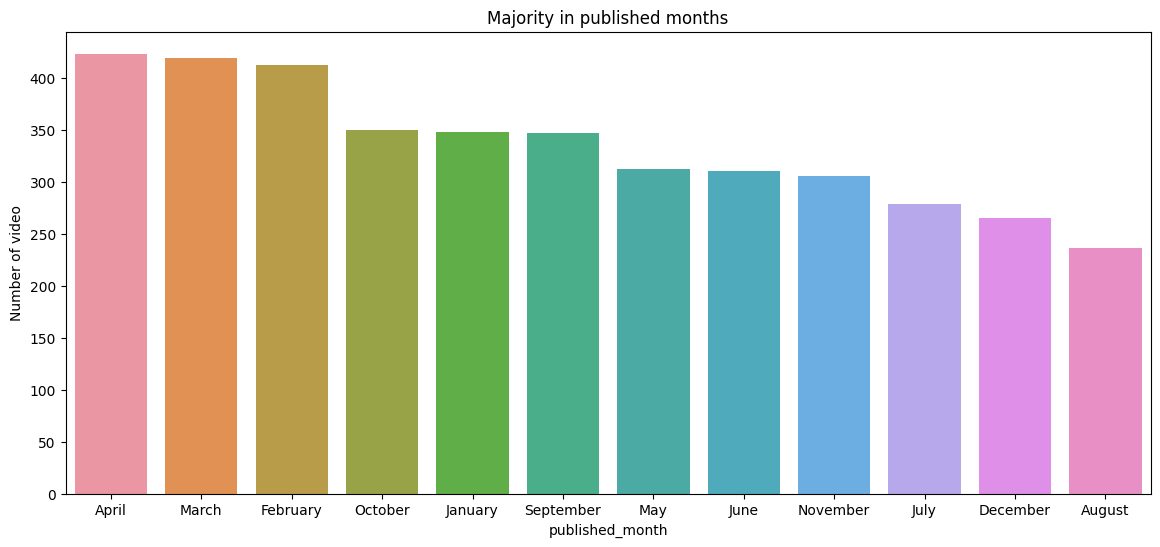

In [129]:
plt.figure(figsize=(14,6))

plt.title("Majority in published months")

sns.barplot(data = majority_published_month, x = 'published_month', y = 'talk_id')
plt.ylabel("Number of video")

Text(0, 0.5, 'Views')

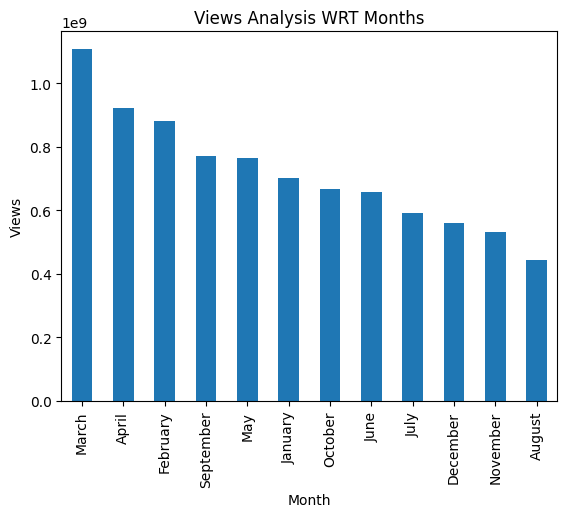

In [130]:
# Let's check which month has got the more number of views in our dataset
monthly_views = ted_talks_dataframe.groupby('published_month')['views'].sum()
monthly_views = monthly_views.sort_values(ascending=False)
monthly_views

monthly_views.plot(kind='bar')
plt.title("Views Analysis WRT Months")
plt.xlabel("Month")
plt.ylabel("Views")


### From the above **Month Analysis with respect to views**, below are our findings:
- Most of the videos were published in the month of **April followed by March and February.**
- And as we expected More number of views were recorded in the month of **March followed by April and February.**

### Now let's analyse the published year with respect to the recorded views of our dataset. Assuming, earlier the year, higher in views recorded.

Text(0, 0.5, 'Views')

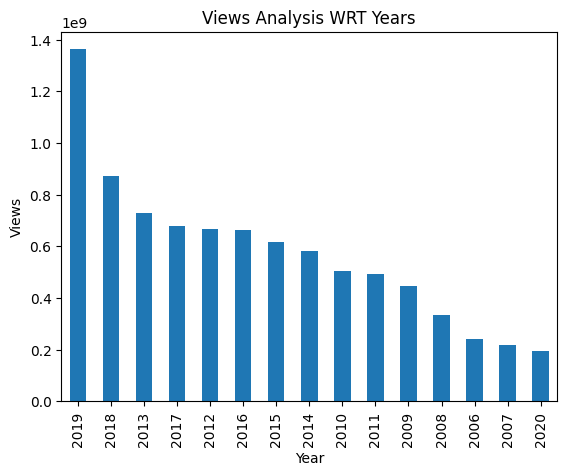

In [131]:
# Let's visualize which year has got more number of views
yearly_views = ted_talks_dataframe.groupby('published_year')['views'].sum()
yearly_views = yearly_views.sort_values(ascending=False)

yearly_views.plot(kind='bar')
plt.title("Views Analysis WRT Years")
plt.xlabel("Year")
plt.ylabel("Views")

### From the Above Year analysis with respect to views, below are our findings.
- To our surprise, more views are recorded with higher the year.
- It might be because of evolution of internet and its publicity.

## Let's check what day that the most of the videos published and further analysis

Text(0, 0.5, 'Views')

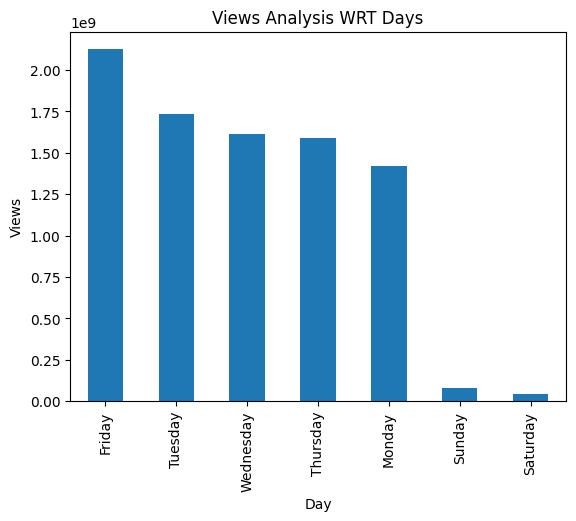

In [132]:
# Here we are visualizing which day of release has got the more views
days_views = ted_talks_dataframe.groupby('published_day')['views'].sum()
days_views = days_views.sort_values(ascending=False)

days_views.plot(kind='bar')
plt.title('Views Analysis WRT Days')
plt.xlabel('Day')
plt.ylabel('Views')

In [133]:
# Checking the published day of most the videos of our dataset.
majority_day = ted_talks_dataframe[['published_day', 'talk_id']].groupby('published_day').agg({'talk_id' : 'count'})
majority_day = majority_day.sort_values(by='talk_id', ascending=False)
majority_day

,talk_id
published_day,
Tuesday,857
Thursday,832
Friday,789
Monday,727
Wednesday,703
Sunday,55
Saturday,42


## From the above views analysis with respect to days, below are our findings,
- Most of the videos were published on Tuesday followed by Thursday and Friday.
- Videos released on Friday bagged more views followed by Tuesday and Wednesday.

## Now let's analyse the speaker_1 column of our dataset.

In [134]:
# Check the duplicates in the speaker_1 column

speaker1_duplicates = ted_talks_dataframe['speaker_1'].value_counts()
speaker1_duplicates = speaker1_duplicates[speaker1_duplicates > 1]
speaker1_duplicates

Alex Gendler        34
Iseult Gillespie    19
Emma Bryce          12
Daniel Finkel       11
Alex Rosenthal      10
                    ..
Janine Benyus        2
Amory Lovins         2
Jane Goodall         2
Johann Hari          2
Frans Lanting        2
Name: speaker_1, Length: 424, dtype: int64

### From the analysis it's confirmed that,
- There are 424 speakers who delivered speeches on more than 1 topic.
- Highest number of videos recorded by a speaker is 34 followed by 19 and 12.
### Now let's check which speaker has bagged more views in total.

Text(0, 0.5, 'No. of views')

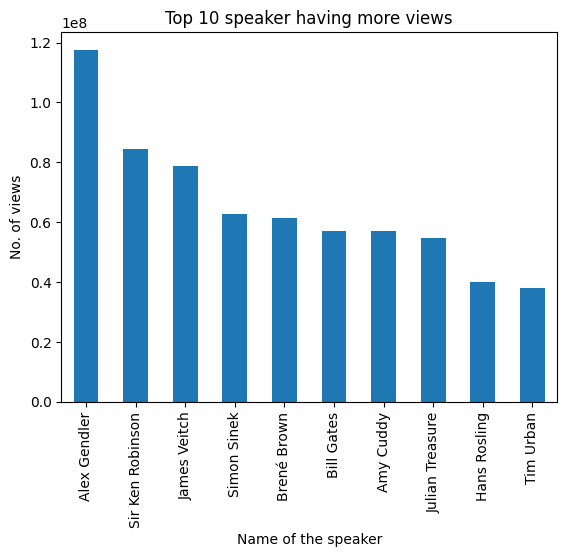

In [135]:
# Plotting the top 10 views of the speaker
speaker1_views = ted_talks_dataframe.groupby('speaker_1')['views'].sum()
speaker1_most_views = speaker1_views.nlargest(10)
speaker1_most_views.plot(kind='bar')
plt.title("Top 10 speaker having more views")
plt.xlabel("Name of the speaker")
plt.ylabel("No. of views")


### **Alex Gendler** was on the top of the list followed by **Sir Ken Robinson and James Veitch.**

### Now let's analyse the 'event' column.

 Total count of each event occured 

 TED-Ed         556
TED2017         96
TED2018         96
TED2019         91
TED2014         84
              ... 
TEDxWanChai      1
TEDxUCDavis      1
TEDxUIdaho       1
TEDxVCU          1
TEDxUMKC         1
Name: event, Length: 459, dtype: int64


Text(0, 0.5, 'Views')

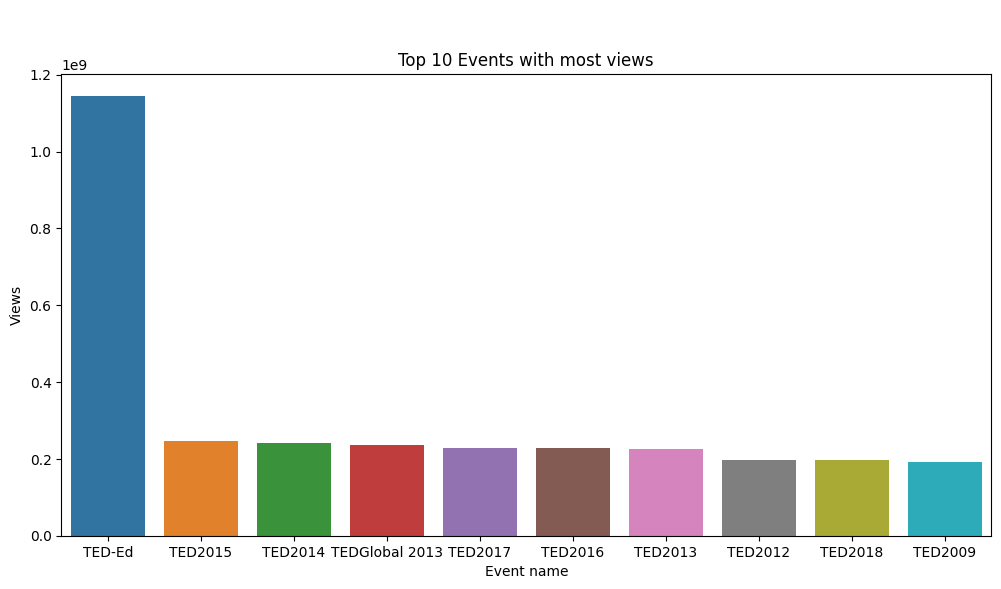

In [136]:
# Lets analyse the most occured event in our dataset.

count_event = ted_talks_dataframe['event'].value_counts().sort_values(ascending=False)
print(" Total count of each event occured \n\n", count_event)

# Now lets see the view count of the top 10 events

event_views = ted_talks_dataframe[['event', 'views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
event_views.reset_index(inplace=True)
plt.figure(figsize=(12,6))
sns.barplot(x='event', y='views', data=event_views)
plt.title("\n\nTop 10 Events with most views")
plt.xlabel("Event name")
plt.ylabel("Views")

###From the above analysis, below are our findings.
- In total there were 459 unique events in our dataset.
- The event **'TED-ED' was the most occured event with count 556**. Followed by **'TED2017' and 'TED2018' of count 96** each.
- Also the event 'TED-ED' bagged the higgest views among the other events, followed by 'TED2015' and 'TED2014'

### Let's explore the Language columns ['native_lang', 'available_lang']

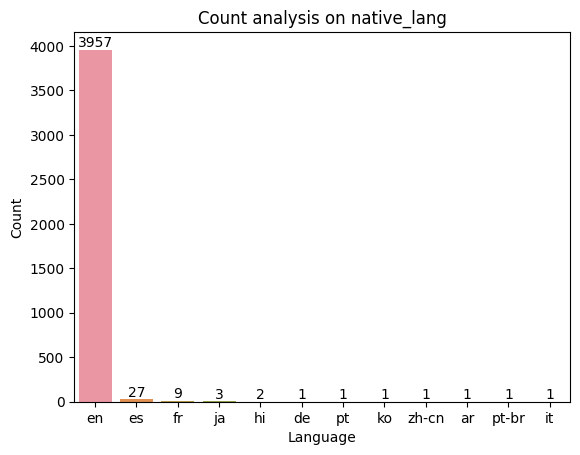

In [137]:
# Plotting the native language count of our dataset
native_lang_counts = ted_talks_dataframe['native_lang'].value_counts()
order = native_lang_counts.sort_values(ascending=False).index
ax = sns.countplot(x='native_lang', data=ted_talks_dataframe, order=order)

# To plot the count of each language in its own bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.title("Count analysis on native_lang")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

### Here the English language is dominating over the others, as it has **3957 entries.**

### Let's Analyse the **title and topic column** of our dataset.

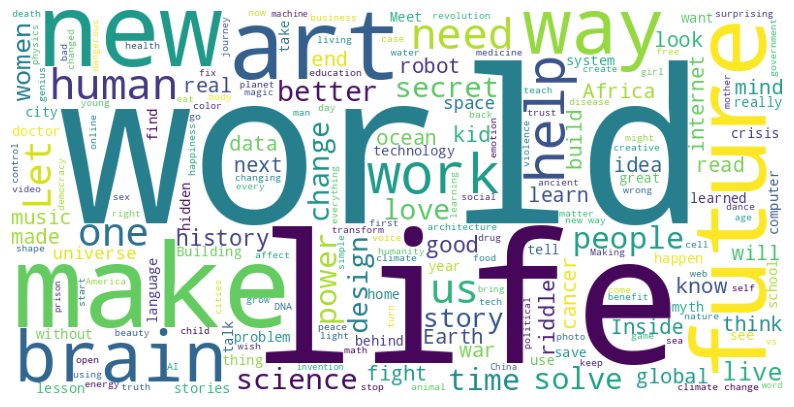

In [138]:
# Creating a word cloud to check the most frequent words used in title
from wordcloud import WordCloud

joined_title = " ".join(ted_talks_dataframe['title'])
title_cloud = WordCloud(width=800, height=400, background_color='white').generate(joined_title)

plt.figure(figsize=(10, 6))
plt.imshow(title_cloud)
plt.axis('off')
plt.show()

# Most frequest words: world, life, future, new, art, etc.

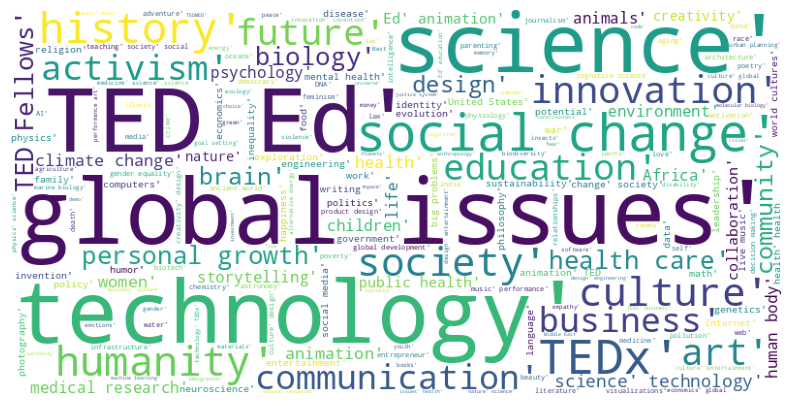

In [139]:
# Create a word cloud for the topic column

joined_topic = " ".join(topic for topic in ted_talks_dataframe.topics.astype(str))
topic_cloud = WordCloud(width=800, height=400, background_color='white').generate(joined_topic)

plt.figure(figsize=(10, 6))
plt.imshow(topic_cloud)
plt.axis('off')
plt.show()

# Most frequent words: technology, global, science, society, etc.,

Text(0.5, 1.0, 'Distribution of Views-Dependent variable')

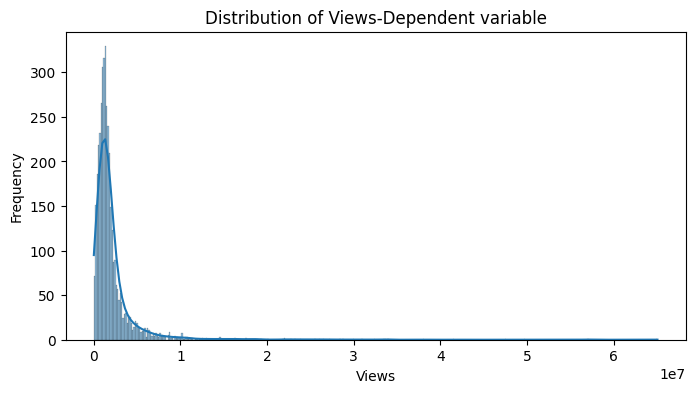

In [140]:
# Lets check the distribution of our dependent variable
plt.figure(figsize=(8,4))
sns.histplot(ted_talks_dataframe['views'], kde=True)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views-Dependent variable')

Text(0.5, 1.0, 'Distribution of Comments')

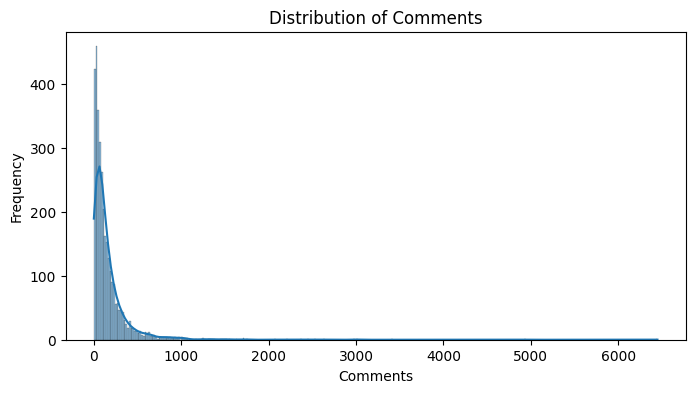

In [141]:
# Plotting the distribution of Comments column
plt.figure(figsize=(8,4))
sns.histplot(ted_talks_dataframe['comments'], kde=True)
plt.xlabel('Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Comments')

Text(0.5, 1.0, 'Distribution of Video duration')

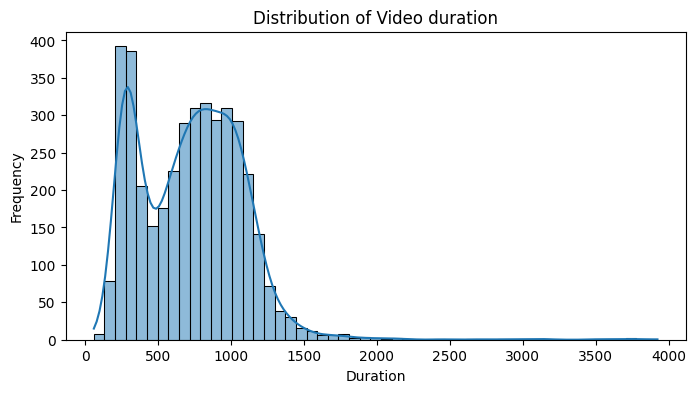

In [142]:
# Plotting the distribution of duration column
plt.figure(figsize=(8,4))
sns.histplot(ted_talks_dataframe['duration'], kde=True)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Video duration')

#### The above numerical features were positively skewed, means that most of the data points were concentrated at the left and few large outliers in our dataset stretches the distribution towards the right.

## Data Cleaning and Outlier Detection and Treatment


In [143]:
# Replacing the null values from the column 'all_speakers'

ted_talks_dataframe["all_speakers"].fillna(value = str({0:""}), axis = 0, inplace=True)
print("Null values in all_speaker column = ", ted_talks_dataframe['all_speakers'].isnull().sum())

Null values in all_speaker column =  0


In [144]:
# Replacing the null values from the column 'occupations'

ted_talks_dataframe['occupations'].fillna(value = str({0:'others'}), axis = 0, inplace=True)
print("Null values in occupation column = ", ted_talks_dataframe['occupations'].isnull().sum())

Null values in occupation column =  0


In [145]:
# Replacing the null values from the column 'about_speaker'

ted_talks_dataframe['about_speakers'].fillna(value = 'Not mentioned', axis = 0, inplace=True)
print("Null values in about_speaker column = ", ted_talks_dataframe['about_speakers'].isnull().sum())

Null values in about_speaker column =  0


In [146]:
# Replacing the null values from the column 'recorded_date'

ted_talks_dataframe['recorded_date'].fillna(value = 'Not mentioned', axis = 0, inplace=True)
print("Null values in recorded_date column = ", ted_talks_dataframe['recorded_date'].isnull().sum())

Null values in recorded_date column =  0


In [147]:
# It is evident that the distribution of comments values is right skewed.
# Replacing the null values of the column 'comments' with the median value to maintain the distribution of the data. 

comments_median = int(ted_talks_dataframe['comments'].median())
ted_talks_dataframe['comments'].fillna(comments_median, inplace=True)

print("\nTotal null values of the dataset = ", ted_talks_dataframe.isnull().sum().sum())


Total null values of the dataset =  0


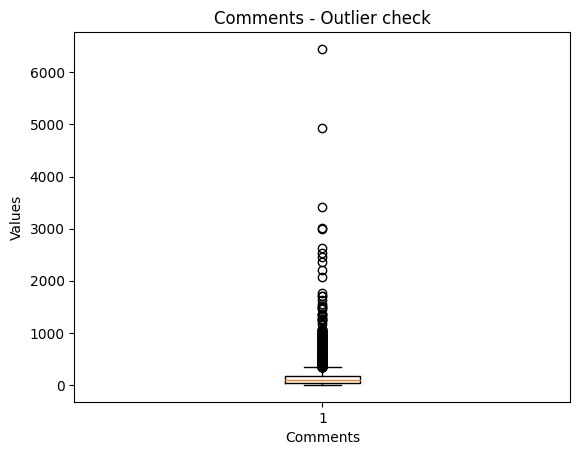

In [148]:
# Lets check the outliers of the 'comments' column

plt.boxplot(ted_talks_dataframe['comments'])
plt.title('Comments - Outlier check')
plt.xlabel('Comments')
plt.ylabel('Values')
plt.show()

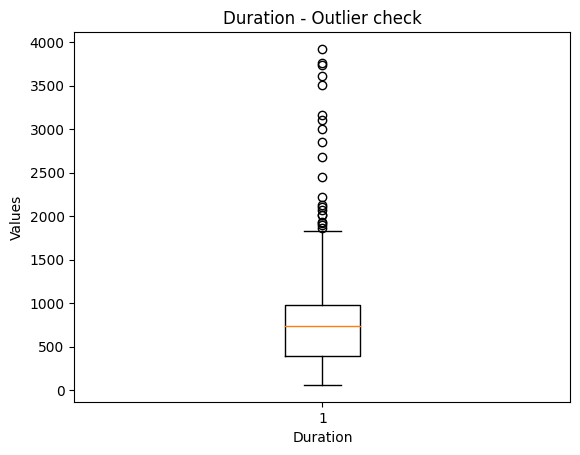

In [149]:
plt.boxplot(ted_talks_dataframe['duration'])
plt.title('Duration - Outlier check')
plt.xlabel('Duration')
plt.ylabel('Values')
plt.show()

In [150]:
# Here we are dealing the outliers with the Inter quartile range method
# Lets create a function to replace the outliers of 'comments' and duration column

def replace_outliers_iqr(data, column, lower_threshold=0.25, upper_threshold=0.75, multiplier=1.5):
  q1 = data[column].quantile(lower_threshold)
  q3 = data[column].quantile(upper_threshold)
  iqr = q3 - q1
  lower_range = q1 - multiplier * iqr
  upper_range = q3 + multiplier * iqr

  data[column] = np.where(
        (data[column] < lower_range) | (data[column] > upper_range),
        data[column].median(),
        data[column]
  )
  return data

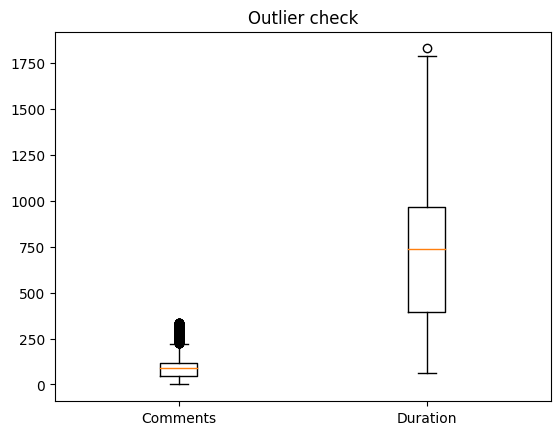

In [151]:
# Here we'll pass the 'comments' and 'duration' columns to treat its outliers

ted_talks_dataframe = replace_outliers_iqr(ted_talks_dataframe, 'comments')

ted_talks_dataframe = replace_outliers_iqr(ted_talks_dataframe, 'duration')
# Now lets check the box plot of the comments and duration now
fig, ax = plt.subplots()
ax.boxplot([ted_talks_dataframe['comments'], ted_talks_dataframe['duration']])
ax.set_xticklabels(['Comments', 'Duration'])
plt.title('Outlier check')
plt.show()

## Feature Engineering
#### The overall objective of feature engineering is to enhance the performance, accuracy, and interpretability of machine learning models by transforming and selecting the most relevant and informative features from the raw data.

In [152]:
# Here we'll add a new feature with the count of the available language

ted_talks_dataframe["available_lang_count"] = ted_talks_dataframe["available_lang"].apply(lambda x: len(eval(x)))


In [153]:
# Lets add an another feature carrying the count of the topics covered

ted_talks_dataframe["topics_covered"] = ted_talks_dataframe["topics"].apply(lambda x: len(eval(x)))

####Let's perform **One-hot encoding and Target encoding** to our categorical features of our dataset.

In [154]:
# Doing target encoding on speaker_1 column
# As it has high cardinality means it has large number of unique values

speaker=ted_talks_dataframe.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
ted_talks_dataframe['speaker_avg_views']=ted_talks_dataframe['speaker_1'].map(speaker)
ted_talks_dataframe.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,related_talks,url,description,transcript,published_day,published_month,published_year,available_lang_count,topics_covered,speaker_avg_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25 00:00:00,2006-06-27,TED2006,...,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Tuesday,June,2006,43,9,2190599.25


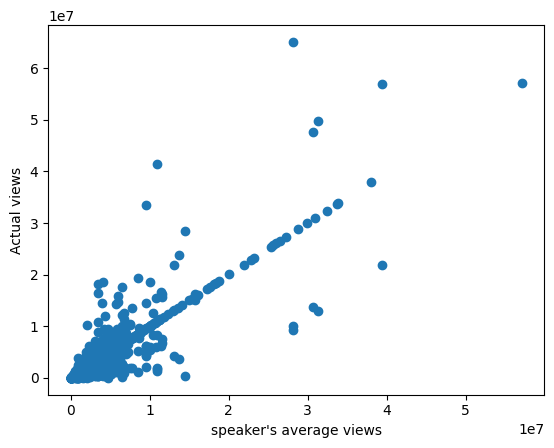

In [155]:
# Let see the distribution of the avg_speaker_views with the actual views.
# And here we can see some linear relation between these variables.
plt.scatter(ted_talks_dataframe['speaker_avg_views'], ted_talks_dataframe['views'])
plt.xlabel("speaker's average views")
plt.ylabel("Actual views")
plt.show()

In [156]:
# Encode the 'published_day' and 'published_month' cloumns using one-hot encoder
# As it has low cardinality.

encode_columns = ['published_day', 'published_month']
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(ted_talks_dataframe[encode_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(encode_columns))
ted_talks_dataframe = pd.concat([ted_talks_dataframe, encoded_df], axis=1)
ted_talks_dataframe.head(1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,published_month_December,published_month_February,published_month_January,published_month_July,published_month_June,published_month_March,published_month_May,published_month_November,published_month_October,published_month_September
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25 00:00:00,2006-06-27,TED2006,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# Let check how old is the videos are and create a new feature for it.

ted_talks_dataframe['video_age']=2023-ted_talks_dataframe['published_year']
ted_talks_dataframe.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,published_month_February,published_month_January,published_month_July,published_month_June,published_month_March,published_month_May,published_month_November,published_month_October,published_month_September,video_age
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25 00:00:00,2006-06-27,TED2006,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17


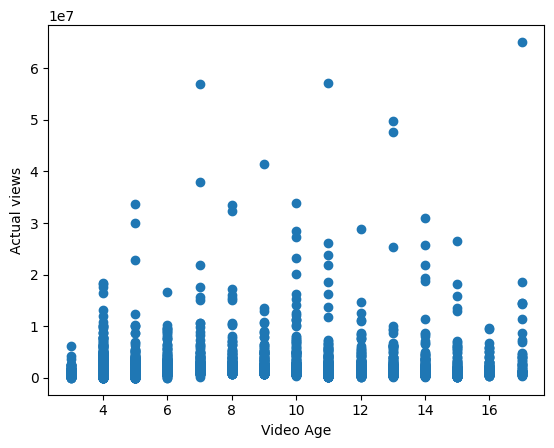

In [158]:
# Here we noticed that old videos has got the highest views

plt.scatter(ted_talks_dataframe['video_age'], ted_talks_dataframe['views'])
plt.xlabel("Video Age")
plt.ylabel("Actual views")
plt.show()

In [159]:
# Perform Target encoding for event column
# In event column - 459 unique values
encode_event=ted_talks_dataframe.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
encode_event=encode_event.to_dict()
encode_event=encode_event.values()
encode_event=list(encode_event)[0]
ted_talks_dataframe['avg_views_for_event']=ted_talks_dataframe['event'].map(encode_event)
ted_talks_dataframe['avg_views_for_event'] = ted_talks_dataframe['avg_views_for_event'].apply(lambda x: round(x, 2))
ted_talks_dataframe.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,published_month_January,published_month_July,published_month_June,published_month_March,published_month_May,published_month_November,published_month_October,published_month_September,video_age,avg_views_for_event
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25 00:00:00,2006-06-27,TED2006,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17,3876290.79


In [160]:
ted_talks_dataframe.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'published_day',
       'published_month', 'published_year', 'available_lang_count',
       'topics_covered', 'speaker_avg_views', 'published_day_Friday',
       'published_day_Monday', 'published_day_Saturday',
       'published_day_Sunday', 'published_day_Thursday',
       'published_day_Tuesday', 'published_day_Wednesday',
       'published_month_April', 'published_month_August',
       'published_month_December', 'published_month_February',
       'published_month_January', 'published_month_July',
       'published_month_June', 'published_month_March', 'published_month_May',
       'published_month_November', 'published_month_October',
       'published_month_September', 'video_age', 'avg_views_for_event

In [161]:
# Lets drop the columns which were not useful to fit in the models.

ted_talks_dataframe.drop(labels = ["talk_id", "title", "speaker_1", "all_speakers", "occupations",
                                   "about_speakers", "recorded_date", "published_date", "event", "native_lang",
                                   "available_lang", "topics", "related_talks", "url", "description",
                                   "transcript", "published_day", "published_month"], axis = 1, inplace = True)

## Data Splitting
#### The objective of data splitting in a machine learning project is to evaluate the performance and generalization ability of a trained model on unseen data.
#### **Training Set:** The training set is used to train the machine learning model. The objective is to expose the model to a significant amount of labeled data, allowing it to learn patterns and relationships within the data.
####**Test Set:** The test set is used to evaluate the performance of the trained model. It represents unseen data that the model has not been exposed to during the training and validation phases.

In [162]:
# independent variables
X = ted_talks_dataframe[list(ted_talks_dataframe.columns)[1:]]

# dependent variable - Target variable
y = ted_talks_dataframe["views"]

### Feature Selection:

In [163]:
# Performing feature selection using F-Regression.
# Fitting the dataset into the model
f_scores = f_regression(X, y)
f_scores
     

(array([6.17411799e+01, 2.34287046e+01, 1.14808807e+01, 5.79875934e+02,
        2.39026992e+00, 1.44431730e+04, 2.47205918e+01, 2.81193303e+00,
        4.84813295e+00, 2.22932912e+00, 5.08411567e+00, 1.37722250e+00,
        1.51355200e+00, 4.27342794e-02, 1.46563489e+00, 3.54204730e-02,
        5.60325654e-03, 5.71791155e-01, 1.01373795e-02, 1.42786889e-02,
        9.69403913e+00, 2.59140573e+00, 4.48081024e+00, 1.83534439e+00,
        1.88371070e-01, 1.14808807e+01, 8.26135334e+02]),
 array([4.99570785e-015, 1.34518470e-006, 7.09949633e-004, 9.03081853e-120,
        1.22171594e-001, 0.00000000e+000, 6.90487429e-007, 9.36436494e-002,
        2.77329142e-002, 1.35491443e-001, 2.41998068e-002, 2.40644643e-001,
        2.18670174e-001, 8.36236933e-001, 2.26107148e-001, 8.50726844e-001,
        9.40333898e-001, 4.49592532e-001, 9.19805915e-001, 9.04890411e-001,
        1.86172023e-003, 1.07523787e-001, 3.43390000e-002, 1.75574047e-001,
        6.64299224e-001, 7.09949633e-004, 2.47632095e-

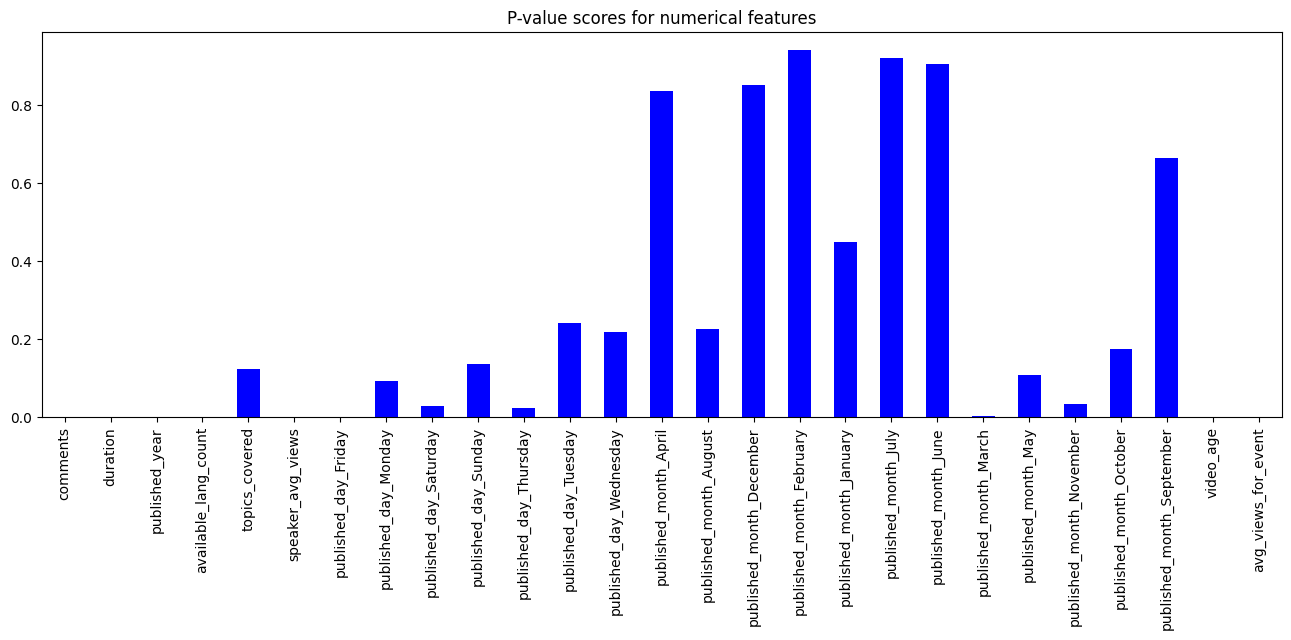

In [164]:
# Plotting the p-values
# Lower the p-vaues, indicates the more significant feature

p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

In [165]:
# Let choose the features with the lowest P-scores from the above

X = X[['comments','duration','published_year','available_lang_count','speaker_avg_views','video_age',
      'avg_views_for_event','published_day_Friday','published_day_Thursday','published_month_March']]

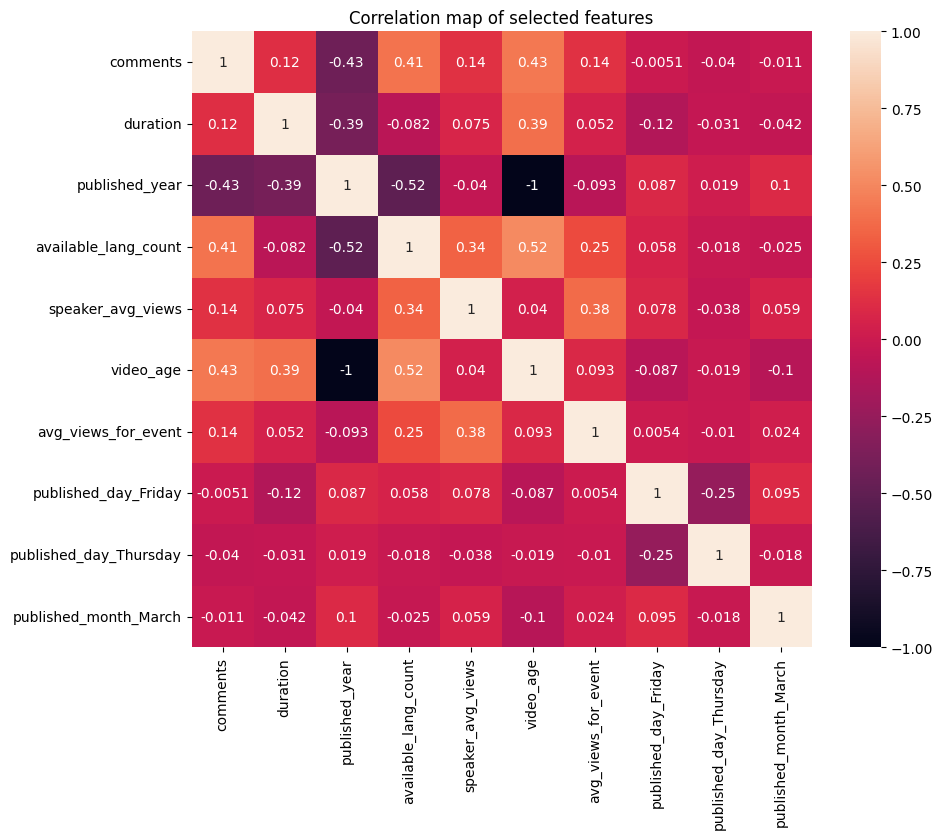

In [166]:
# Lets check the correlation between the selected features

corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation map of selected features")
plt.show()

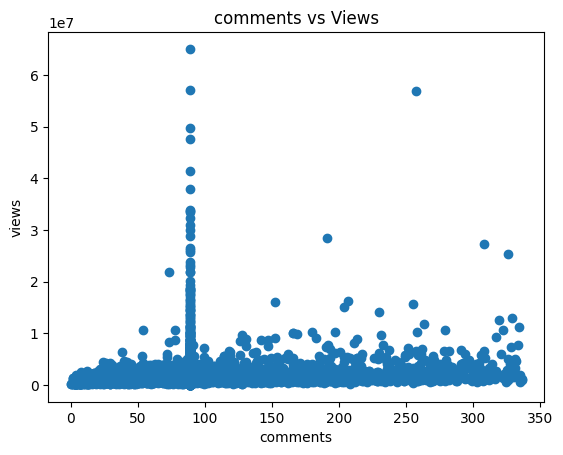

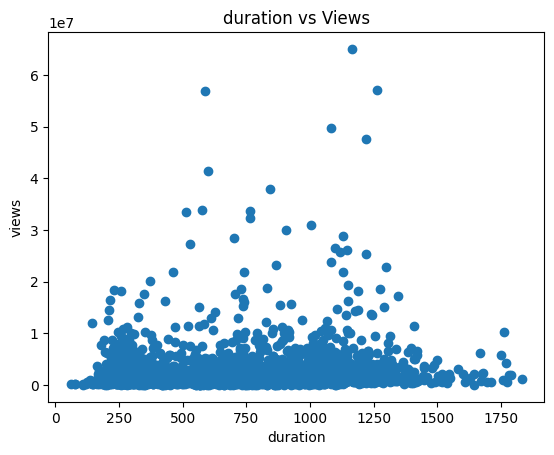

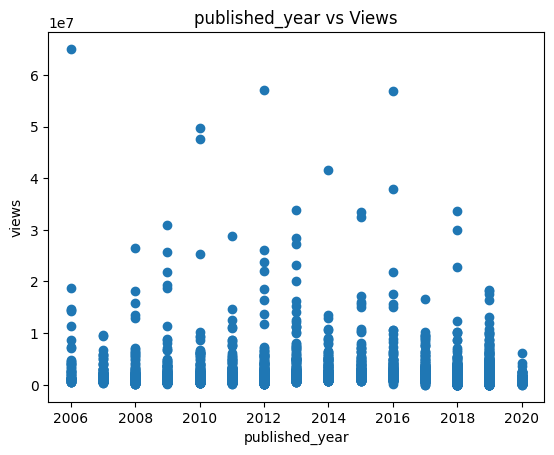

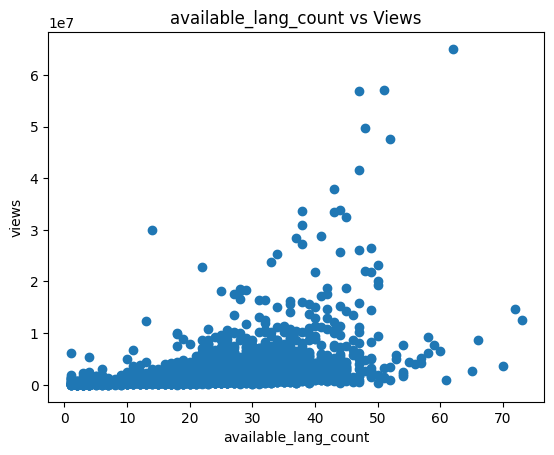

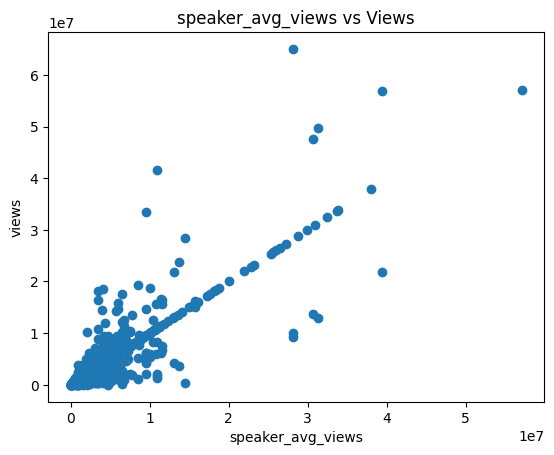

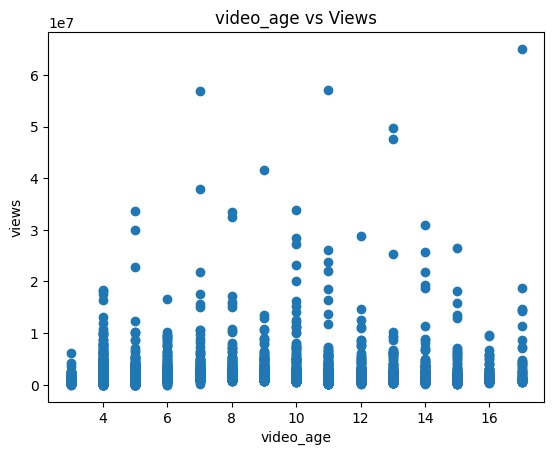

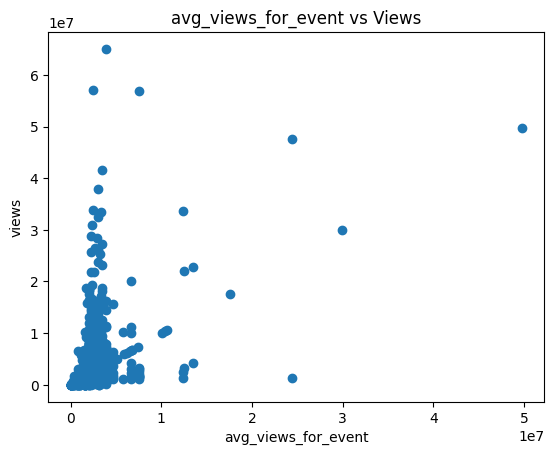

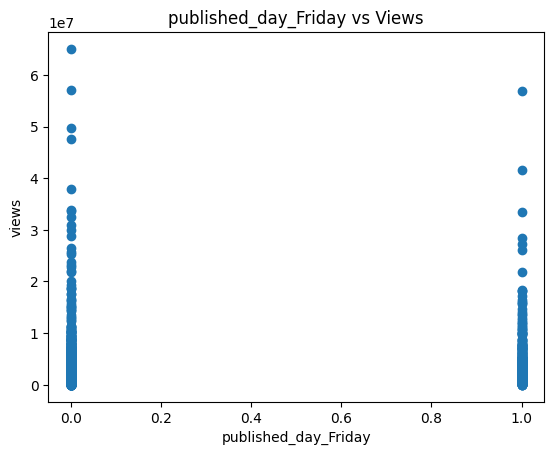

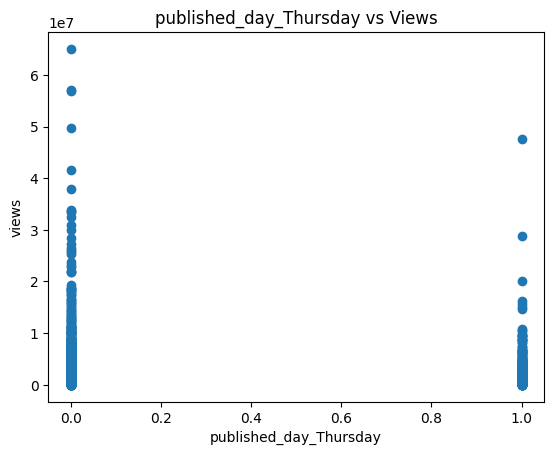

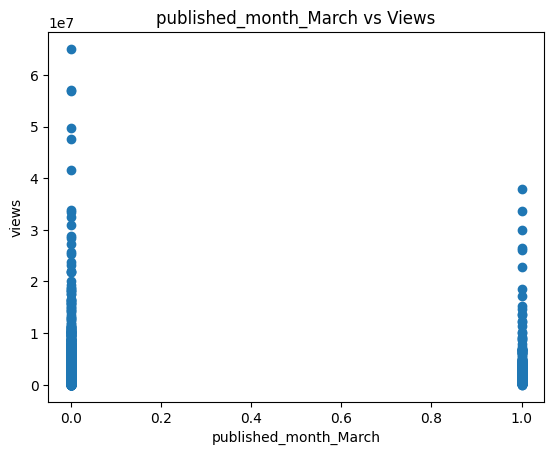

In [167]:
#Let's check out the distribution of the selected features over the target variable.
for feature in X.columns:
  plt.scatter(X[feature], y)
  plt.xlabel(feature)
  plt.ylabel('views')
  plt.title(f'{feature} vs Views')
  plt.show()

In [168]:
# Split the dataset into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [169]:
# Check the shape of the X (independent) dataset
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(3204, 10) (3204,)
(801, 10) (801,)


## Feature Scaling
#### Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [170]:
# Apply feature scaling to our training and test datasets- Independent variable

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training
### Let's train different regressor models by fitting our processed dataset to it.
### **1. Linear Regressor Model:**
####Linear regression is a widely used statistical modeling technique for predicting a continuous outcome variable based on one or more input features. It assumes a linear relationship between the input variables and the target variable. In a linear regression model, the goal is to find the best-fitting line that minimizes the difference between the predicted values and the actual values of the target variable. 

In [171]:
# Creating an object for the linear regressor.
reg = LinearRegression()

#Fitting our training dataset to the model
reg.fit(X_train, y_train)

# Predicting the dependent values for training and test set
y_test_pred = reg.predict(X_test)

# Evaluate the model
mse  = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_test_pred)
r2_lr= r2_score(y_test, y_test_pred)
adj_r2_lr = (1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

#Print the evaluation results
print("Mean Squared Error: ", mse)
print("Root MSE: ", rmse)
print("Mean Absolute Error: ", mae)
print("R2: ", r2_lr)
print("Adjusted R2: ", adj_r2_lr)

Mean Squared Error:  1129505204218.0447
Root MSE:  1062781.8234322814
Mean Absolute Error:  468444.7594840452
R2:  0.8775461378768761
Adjusted R2:  0.8759960889892415


### Hypertuning Linear Regressor model

In [172]:
#Linear Regressor param_dist
param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2, 4]
}

In [ ]:
# Create an instance of the random forest regressor
lr_model = LinearRegression()

# Perform Grid Search to find the best hyperparameters
random_search_lr = RandomizedSearchCV(lr_model, param_distributions=param_dist, n_iter=10, cv=5)
random_search_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [-1, 1, 2, 4]})

In [173]:
# Get the best hyperparameters for linear regressor model
best_params = random_search_lr.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model_lr = random_search_lr.best_estimator_
y_pred_rs_lr = best_model_lr.predict(X_test)

# Evaluate the model
best_mse_lr = mean_squared_error(y_test, y_pred_rs_lr)
best_rmse_lr = np.sqrt(best_mse_lr)
best_r2_lr = r2_score(y_test, y_pred_rs_lr)
adj_r2_best_lr = (1-(1-r2_score(y_test, y_pred_rs_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print(f"Mean Squared Error: {best_mse_lr}")
print(f"Root Mean Squared Error: {best_rmse_lr}")
print(f"R Square: {best_r2_lr}")
print(f"Adjusted R Square: {adj_r2_best_lr}")

Best Hyperparameters: {'n_jobs': -1, 'fit_intercept': False, 'copy_X': False}
Mean Squared Error: 1128368215257.9216
Root Mean Squared Error: 1062246.7770051938
R Square: 0.8776694030808242
Adjusted R Square: 0.8761209145122271


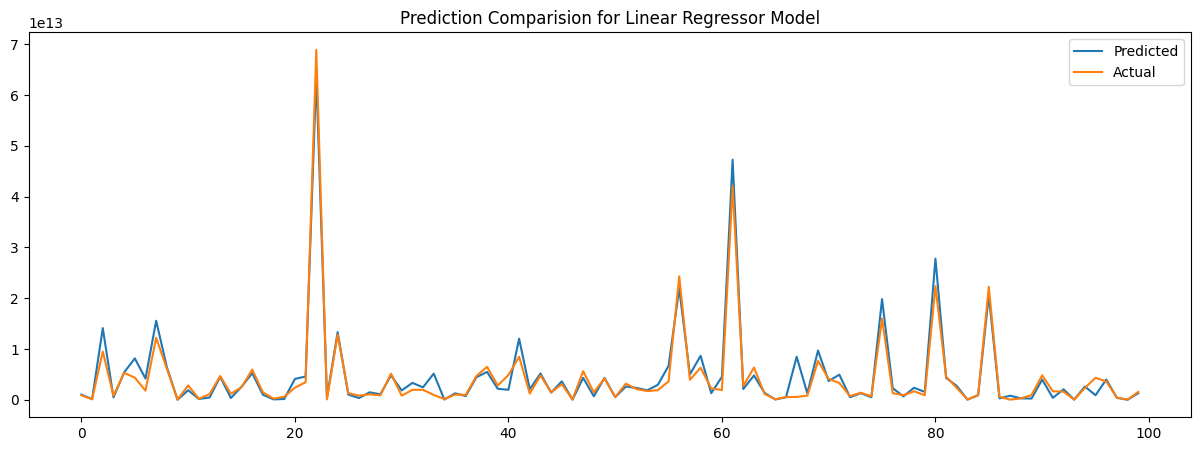

In [174]:
# Lets visualize the comparision between the predicted and the actual target variable

plt.figure(figsize=(15,5))
plt.plot(np.square(y_pred_rs_lr[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title("Prediction Comparision for Linear Regressor Model")
plt.show()

### **2. Decision Tree:**
####Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

####Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In [175]:
# Create a Decision Tree Regressor object
decision_reg = DecisionTreeRegressor()

# Fit the model to the training data
decision_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_reg.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = metrics.mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
adj_r2_dt = (1-(1-r2_score(y_test, y_pred_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

print("Mean Squared Error:", mse_dt)
print("Root MSE: ", rmse_dt)
print("MAE: ", mae_dt)
print("R2:", r2_dt)
print("Adjusted R2: ", adj_r2_dt)

Mean Squared Error: 7606814716011.463
Root MSE:  2758045.452129363
MAE:  707778.8739076154
R2: 0.17531691137670935
Adjusted R2:  0.1648778849384398


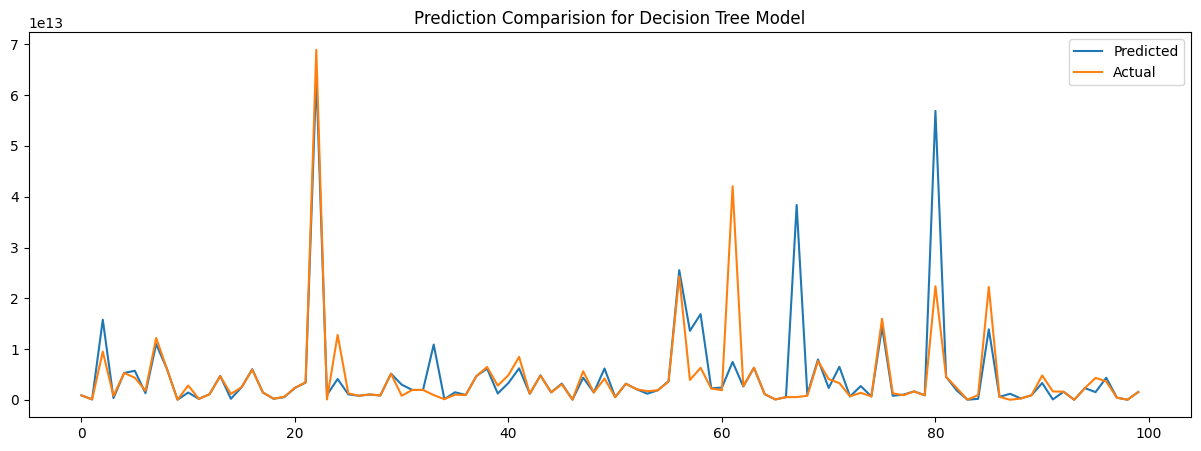

In [176]:
#Let's compare the prediction of the dependent variable with the actual one

plt.figure(figsize=(15,5))
plt.plot(np.square(y_pred_dt[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title("Prediction Comparision for Decision Tree Model")
plt.show()

### 3. XG-Boost Regressor Model
#### XGBoost (eXtreme Gradient Boosting) is an ensemble learning method that uses gradient boosting to train predictive models.
#### The XGBoost regressor is specifically designed for regression problems where the goal is to predict a continuous target variable. It can handle both simple and complex regression tasks and is known for its strong performance.

In [177]:
# Creating an object for XGB regressor model
xg_boost = XGBRegressor(random_state=0)

# Fitting the model
xg_boost.fit(X_train,y_train)

# Prediction on test data
y_pred_xgb = xg_boost.predict(X_test)

# Evaluating the model
mse_xgb  = mean_squared_error((y_test),(y_pred_xgb))
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score((y_test), (y_pred_xgb))
adj_r2_xgb = (1-(1-r2_score(y_test, y_pred_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

print("Mean Squared Error:", mse_xgb)
print("RMSE: ", rmse_xgb)
print("MAE: ", mae_xgb)
print("R2:", r2_xgb)
print("Adjusted R2: ", adj_r2_xgb)

Mean Squared Error: 2489166879607.597
RMSE:  1577709.3774227232
MAE:  506177.32668149186
R2: 0.7301401562926542
Adjusted R2:  0.1648778849384398


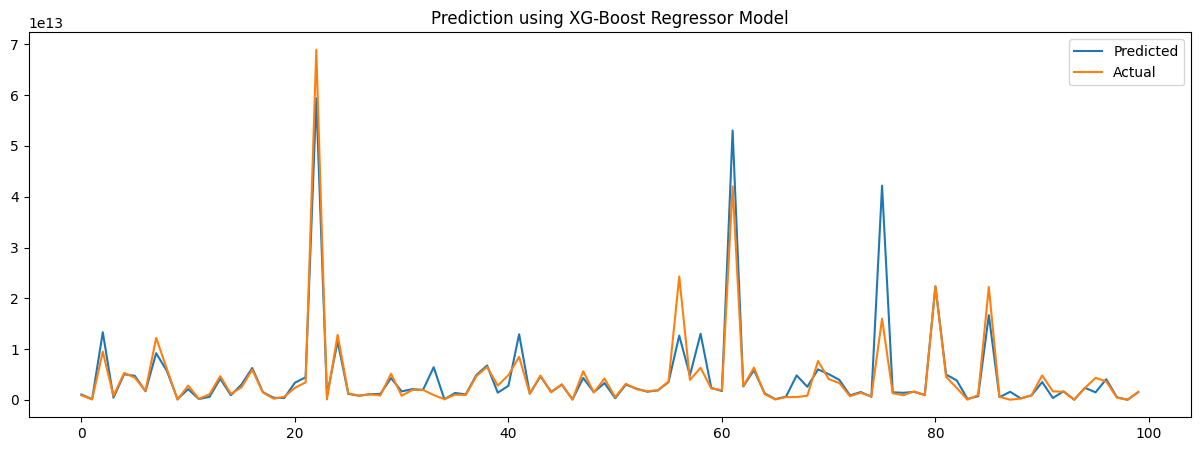

In [178]:
# Actual vs predicted values of dependent variables for 100 observation for better visualisation
plt.figure(figsize=(15,5))
plt.plot(np.square(y_pred_xgb[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title("Prediction using XG-Boost Regressor Model")
plt.show()

###**3. Random Forest:**
####Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

####As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

####Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [179]:
# Create a Random Forest Regressor object
rf_reg = RandomForestRegressor()

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
adj_r2_rf = (1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

print("Mean Squared Error:", mse_rf)
print("RMSE: ", rmse_rf)
print("MAE: ", mae_rf)
print("R2:", r2_rf)
print("Adjusted R2: ", adj_r2_rf)



Mean Squared Error: 1808320764483.372
RMSE:  1344738.1769264126
MAE:  433481.84024968784
R2: 0.8039532170887794
Adjusted R2:  0.801471612241802


### Hypertuning for Random Forest Regression

In [180]:
#Random Forest Regressor param_dict
n_estimators = [100,200,300]
max_depth = [None,5,10]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [181]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor()

# Perform Randomized Search CV to find the best hyperparameters
random_search = RandomizedSearchCV(rf_model,param_dict,n_iter=10, cv=5)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [182]:
# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = random_search.best_estimator_
y_pred_gs = best_model.predict(X_test)

# Evaluate the model
best_mse = mean_squared_error(y_test, y_pred_gs)
best_rmse = np.sqrt(best_mse)
best_r2 = r2_score(y_test, y_pred_gs)
adj_r2_best = (1-(1-r2_score(y_test, y_pred_gs))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print(f"Mean Squared Error: {best_mse}")
print(f"Root Mean Squared Error: {best_rmse}")
print(f"R Square: {best_r2}")
print(f"Adjusted R Square: {adj_r2_best}")

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Mean Squared Error: 1361880992472.9272
Root Mean Squared Error: 1166996.5691778734
R Square: 0.8523534139926021
Adjusted R Square: 0.8504844698659262


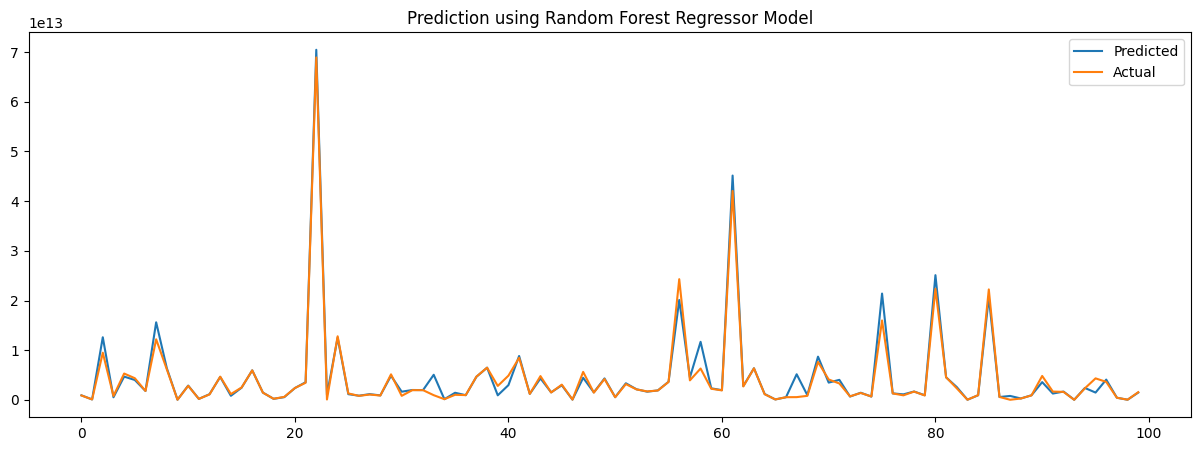

In [183]:
# Let's visualize the actual and predicted dependent variable
plt.figure(figsize=(15,5))
plt.plot(np.square(y_pred_gs[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title("Prediction using Random Forest Regressor Model")
plt.show()

### **Feature Importance**
#### Now let's check the feature that is most important in predicting the dependent variable.

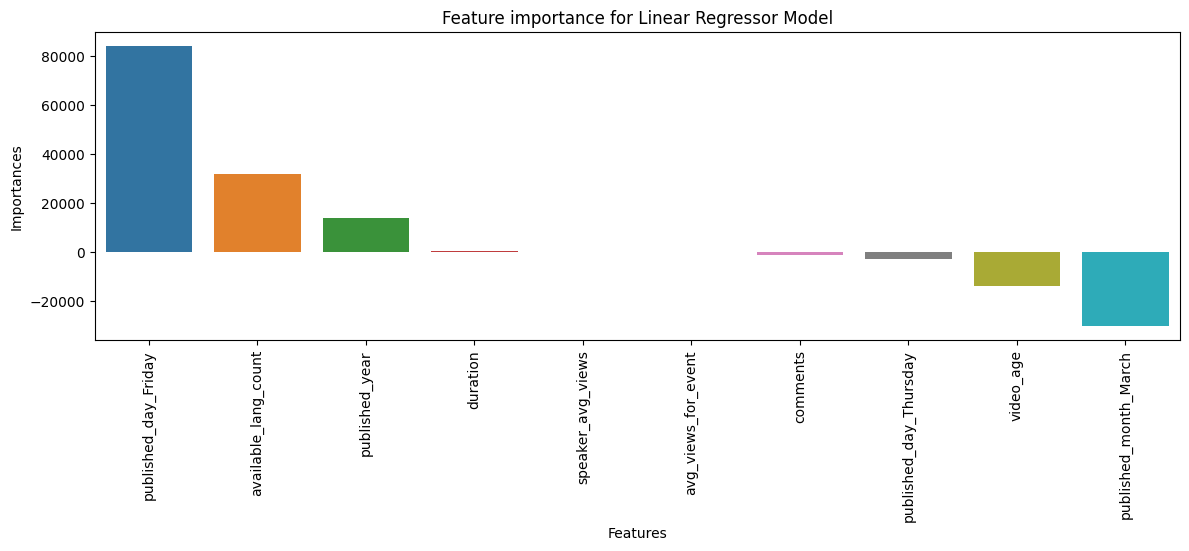

In [184]:
# Lets check important features for taken by Linear Regression algorithm
lr = LinearRegression()
lr.fit(X, y)

importance = pd.DataFrame({'Features': X.columns, 
                            'Importances': lr.coef_})
    
importance.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importance)
plt.xticks(rotation='vertical')
plt.title('Feature importance for Linear Regressor Model')
plt.show()

#### From the above plot it is evident that the feature **"published_day_Friday"** is the most important feature for Linear Regression Model followed by **"available_lang_count"** and **"published_year".**



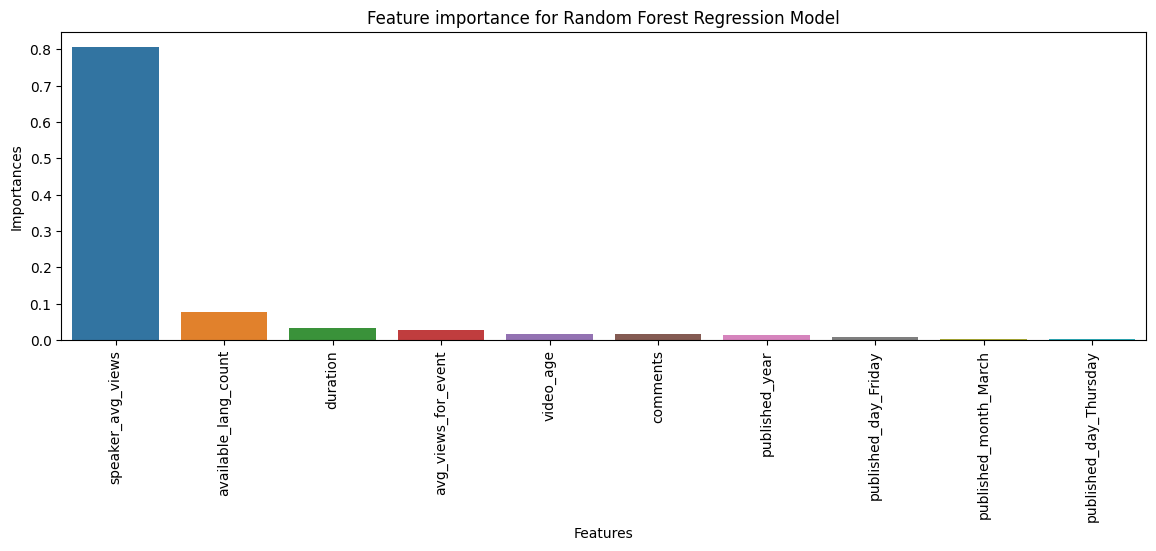

In [185]:
# Lets check important features for taken by Random Forest algorithm
rf = RandomForestRegressor()
rf.fit(X, y)

importance = pd.DataFrame({'Features': X.columns, 
                            'Importances': rf.feature_importances_})
    
importance.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importance)
plt.xticks(rotation='vertical')
plt.title('Feature importance for Random Forest Regression Model')
plt.show()

#### From the above plot it is evident that the feature **"speaker_avg_views"** is the most important feature for Random Forest Regression Model followed by **"available_lang_count"** and **"duration".**

## **Conclusion-**

* In conclusion, we have trained below **Four Machine Learning Models** with our Ted Talks dataset.
#####**Linear Regressor** 
#####**Decision Tree**
#####**Extreme Gradient Boost(XGB) Regressor**
#####**Random Forest**
* We have done the EDA and data preprocessing procedures before training our model.
* To evaluate the performance of the model, we are considering **Mean Squared Error (MSE)**, the most common metric to evaluate the ML model performance.
* By achieving the lowest MSE among the models we've trained, it suggests that **Linear regressor** and followed by **Random Forest Model** was able to capture the underlying patterns and relationships in our dataset effectively.
* And the important features of our dataset were **"published_day_Friday"** followed by **"available_lang_count"** and **"published_year"** for Linear Regressor Model.
* Important features of our dataset were **"speaker_avg_views"** followed by **"available_lang_count"** and **"duration"** for Random Forest Regressor Model.

Thank you for reviewing. Appreciate your time.

